In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Đọc dữ liệu từ tệp CSV
df = pd.read_csv("botswana_bank_customer_churn.csv")

# Thông tin cơ bản về dữ liệu
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   RowNumber                        115640 non-null  int64  
 1   CustomerId                       115640 non-null  object 
 2   Surname                          115640 non-null  object 
 3   First Name                       115640 non-null  object 
 4   Date of Birth                    115640 non-null  object 
 5   Gender                           115640 non-null  object 
 6   Marital Status                   115640 non-null  object 
 7   Number of Dependents             115640 non-null  int64  
 8   Occupation                       115640 non-null  object 
 9   Income                           115640 non-null  float64
 10  Education Level                  115640 non-null  object 
 11  Address                          115640 non-null  object 
 12  Co

In [19]:
print(df.describe())

           RowNumber  Number of Dependents         Income  Customer Tenure  \
count  115640.000000         115640.000000  115640.000000    115640.000000   
mean    57820.500000              2.502923   52641.363046        15.490591   
std     33382.536902              1.707249   27429.756390         8.654217   
min         1.000000              0.000000    5000.960000         1.000000   
25%     28910.750000              1.000000   28857.070000         8.000000   
50%     57820.500000              3.000000   52658.110000        15.000000   
75%     86730.250000              4.000000   76364.157500        23.000000   
max    115640.000000              5.000000   99999.510000        30.000000   

        Credit Score  Credit History Length  Outstanding Loans     Churn Flag  \
count  115640.000000          115640.000000      115640.000000  115640.000000   
mean      574.299775              15.546602       25502.731792       0.121878   
std       159.067499               8.654630       1412

In [20]:
print(df.head())

   RowNumber                            CustomerId   Surname First Name  \
0          1  83ef0b54-35f6-4f84-af58-5653ac0c0dc4     Smith       Troy   
1          2  009f115a-e5ca-4cf4-97d6-530140545e4e  Sullivan    Katrina   
2          3  66309fd3-5009-44d3-a3f7-1657c869d573    Fuller      Henry   
3          4  b02a30df-1a5f-4087-8075-2a35432da641     Young    Antonio   
4          5  0d932e5b-bb3a-4104-8c83-f84270f7f2ea  Andersen       John   

  Date of Birth  Gender Marital Status  Number of Dependents  \
0     8/29/1987    Male       Divorced                     3   
1      2/7/2000  Female        Married                     1   
2      2/3/1954  Female         Single                     1   
3     1/15/1991  Female       Divorced                     5   
4      4/8/1992  Female       Divorced                     2   

                        Occupation    Income  ...  \
0      Information systems manager  77710.14  ...   
1               Charity fundraiser  58209.87  ...   
2  Te

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,115640.0,57820.500000,33382.536902,1.00,28910.750,57820.500,86730.2500,115640.00
Number of Dependents,115640.0,2.502923,1.707249,0.00,1.000,3.000,4.0000,5.00
Income,115640.0,52641.363046,27429.756390,5000.96,28857.070,52658.110,76364.1575,99999.51
Customer Tenure,115640.0,15.490591,8.654217,1.00,8.000,15.000,23.0000,30.00
Credit Score,115640.0,574.299775,159.067499,300.00,436.000,574.000,712.0000,850.00
Credit History Length,115640.0,15.546602,8.654630,1.00,8.000,16.000,23.0000,30.00
Outstanding Loans,115640.0,25502.731792,14127.859827,1000.43,13226.060,25505.285,37742.2500,49999.69
Churn Flag,115640.0,0.121878,0.327147,0.00,0.000,0.000,0.0000,1.00
Balance,115640.0,124639.209748,72210.476638,1.06,61991.915,124505.890,187122.9225,249998.91
NumOfProducts,115640.0,2.999274,1.411361,1.00,2.000,3.000,4.0000,5.00


In [22]:
#Lọc cột không cần thiết
#Các cột không cần thiết bao gồm RowNumber, CustomerId, Surname, First Name, Date of Birth, Address, Contact Information, Churn Reason, và Churn Date

# Kiểm tra xem các cột có tồn tại trong DataFrame hay không trước khi loại bỏ
columns_to_drop = [
    'RowNumber', 'CustomerId', 'Surname', 'First Name', 
    'Occupation', 'Address', 'Contact Information', 
    'Churn Reason', 'Churn Date'
]

# Lọc cột không cần thiết nếu chúng tồn tại trong DataFrame
filtered_data = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Kiểm tra kết quả sau khi lọc
print(filtered_data.head())  # In ra 5 dòng đầu của dữ liệu đã được lọc
print(filtered_data.columns)  # In ra danh sách các cột còn lại trong dữ liệu



  Date of Birth  Gender Marital Status  Number of Dependents    Income  \
0     8/29/1987    Male       Divorced                     3  77710.14   
1      2/7/2000  Female        Married                     1  58209.87   
2      2/3/1954  Female         Single                     1   9794.01   
3     1/15/1991  Female       Divorced                     5  15088.98   
4      4/8/1992  Female       Divorced                     2  60726.56   

  Education Level  Customer Tenure Customer Segment  \
0     High School               30           Retail   
1     High School               27              SME   
2     High School               14           Retail   
3     High School               23        Corporate   
4        Master's               22        Corporate   

  Preferred Communication Channel  Credit Score  Credit History Length  \
0                           Phone           397                     24   
1                           Email           665                     10   
2 

Gender: Giới tính của khách hàng.
Marital Status: Tình trạng hôn nhân của khách hàng.
Number of Dependents: Số người phụ thuộc của khách hàng.
Occupation: Nghề nghiệp của khách hàng.
Income: Thu nhập hàng năm của khách hàng.
Education Level: Trình độ học vấn của khách hàng.
Customer Tenure: Số năm khách hàng đã sử dụng dịch vụ của ngân hàng.
Customer Segment: Phân khúc khách hàng.
Preferred Communication Channel: Kênh giao tiếp ưa thích của khách hàng.
Credit Score: Điểm tín dụng của khách hàng.
Credit History Length: Thời gian có lịch sử tín dụng của khách hàng.
Outstanding Loans: Tổng số tiền vay chưa trả của khách hàng.
Balance: Số dư tài khoản của khách hàng.
NumOfProducts: Số sản phẩm/dịch vụ ngân hàng mà khách hàng đang sử dụng.
NumComplaints: Số lượng khiếu nại của khách hàng.

In [23]:
# Xử lý ngày sinh và tính tuổi
from datetime import datetime
import pandas as pd

# Chuyển đổi cột 'Date of Birth' thành datetime, nếu có lỗi thì sẽ gán NaT
filtered_data['Date of Birth'] = pd.to_datetime(filtered_data['Date of Birth'], errors='coerce')

# Tính tuổi dựa trên ngày sinh và thay thế cột 'Date of Birth' bằng cột 'age'
filtered_data['age'] = (pd.to_datetime('today') - filtered_data['Date of Birth']).dt.days // 365

# loại bỏ cột 'Date of Birth' và chỉ giữ lại tuổi
filtered_data = filtered_data.drop(columns=['Date of Birth'])


In [24]:
# Xử lý các cột phân loại (object)
for col in filtered_data.columns:
    if filtered_data[col].dtype == 'object':
        print(f"Value counts for {col}:")
        print(filtered_data[col].value_counts().sort_values(ascending=False))
        print()


Value counts for Gender:
Gender
Female    57830
Male      57810
Name: count, dtype: int64

Value counts for Marital Status:
Marital Status
Single      38684
Divorced    38539
Married     38417
Name: count, dtype: int64

Value counts for Education Level:
Education Level
Master's       28970
Diploma        28950
High School    28868
Bachelor's     28852
Name: count, dtype: int64

Value counts for Customer Segment:
Customer Segment
SME          38903
Corporate    38606
Retail       38131
Name: count, dtype: int64

Value counts for Preferred Communication Channel:
Preferred Communication Channel
Email    58044
Phone    57596
Name: count, dtype: int64



In [25]:
# Mã hóa nhị phân các cột phân loại với 2 giá trị
filtered_data['Gender'] = filtered_data['Gender'].map({'Female': 1, 'Male': 0})
filtered_data['Preferred Communication Channel'] = filtered_data['Preferred Communication Channel'].map({'Email': 1, 'Phone': 0})

# Mã hóa các cột phân loại với nhiều giá trị và thay thế các cột cũ
filtered_data = pd.get_dummies(filtered_data, columns=['Marital Status', 'Education Level', 'Customer Segment'], drop_first=True)

# Kiểm tra kết quả sau khi mã hóa
print(filtered_data.head())


   Gender  Number of Dependents    Income  Customer Tenure  \
0       0                     3  77710.14               30   
1       1                     1  58209.87               27   
2       1                     1   9794.01               14   
3       1                     5  15088.98               23   
4       1                     2  60726.56               22   

   Preferred Communication Channel  Credit Score  Credit History Length  \
0                                0           397                     24   
1                                1           665                     10   
2                                1           715                     21   
3                                0           747                     17   
4                                1           549                     25   

   Outstanding Loans  Churn Flag    Balance  NumOfProducts  NumComplaints  \
0           41959.74           0  211359.05              1              0   
1            8916.67  

In [26]:
print(filtered_data.columns)


Index(['Gender', 'Number of Dependents', 'Income', 'Customer Tenure',
       'Preferred Communication Channel', 'Credit Score',
       'Credit History Length', 'Outstanding Loans', 'Churn Flag', 'Balance',
       'NumOfProducts', 'NumComplaints', 'age', 'Marital Status_Married',
       'Marital Status_Single', 'Education Level_Diploma',
       'Education Level_High School', 'Education Level_Master's',
       'Customer Segment_Retail', 'Customer Segment_SME'],
      dtype='object')


In [27]:

filtered_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,115640.0,0.500086,0.500002,0.00,0.000,1.000,1.0000,1.00
Number of Dependents,115640.0,2.502923,1.707249,0.00,1.000,3.000,4.0000,5.00
Income,115640.0,52641.363046,27429.756390,5000.96,28857.070,52658.110,76364.1575,99999.51
Customer Tenure,115640.0,15.490591,8.654217,1.00,8.000,15.000,23.0000,30.00
Preferred Communication Channel,115640.0,0.501937,0.499998,0.00,0.000,1.000,1.0000,1.00
Credit Score,115640.0,574.299775,159.067499,300.00,436.000,574.000,712.0000,850.00
Credit History Length,115640.0,15.546602,8.654630,1.00,8.000,16.000,23.0000,30.00
Outstanding Loans,115640.0,25502.731792,14127.859827,1000.43,13226.060,25505.285,37742.2500,49999.69
Churn Flag,115640.0,0.121878,0.327147,0.00,0.000,0.000,0.0000,1.00
Balance,115640.0,124639.209748,72210.476638,1.06,61991.915,124505.890,187122.9225,249998.91


In [28]:
print(filtered_data.dtypes)

Gender                               int64
Number of Dependents                 int64
Income                             float64
Customer Tenure                      int64
Preferred Communication Channel      int64
Credit Score                         int64
Credit History Length                int64
Outstanding Loans                  float64
Churn Flag                           int64
Balance                            float64
NumOfProducts                        int64
NumComplaints                        int64
age                                  int64
Marital Status_Married                bool
Marital Status_Single                 bool
Education Level_Diploma               bool
Education Level_High School           bool
Education Level_Master's              bool
Customer Segment_Retail               bool
Customer Segment_SME                  bool
dtype: object


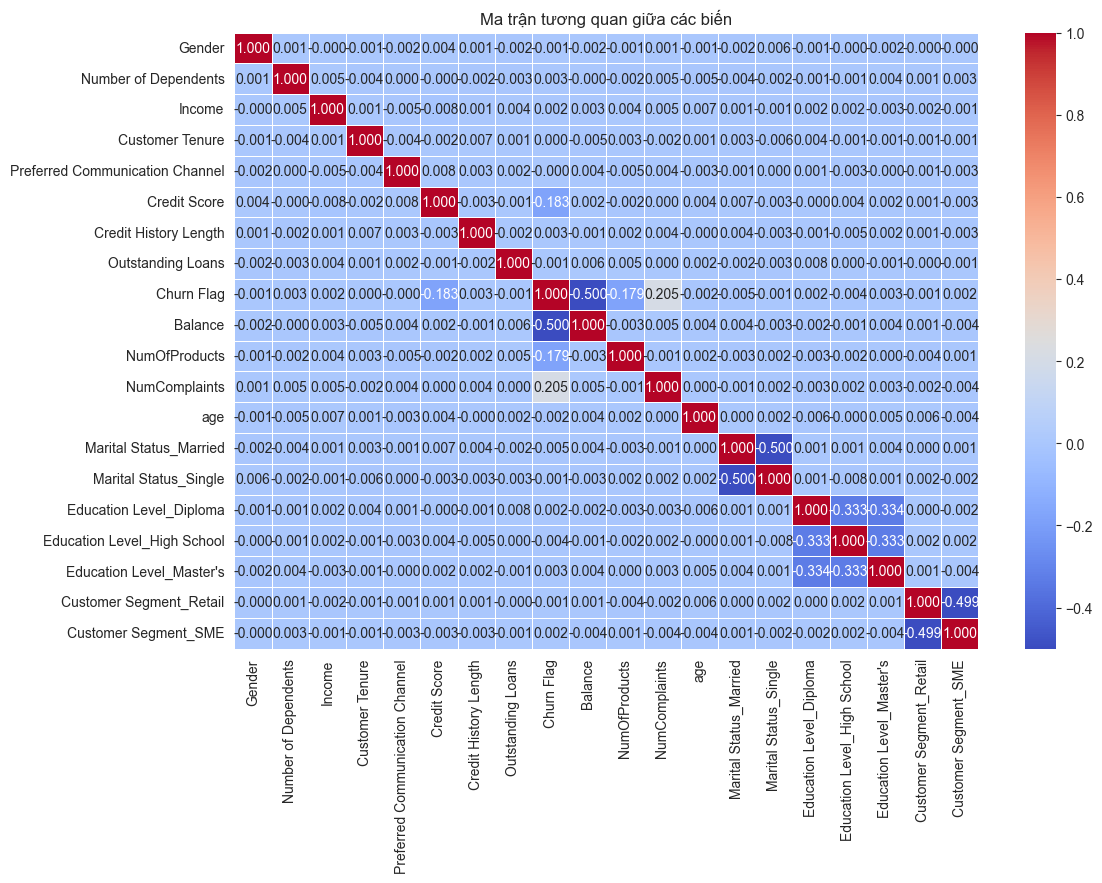

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính toán ma trận tương quan
correlation_matrix = filtered_data.corr()

# Tạo biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', linewidths=0.5)

# Thiết lập tiêu đề cho biểu đồ
plt.title('Ma trận tương quan giữa các biến')
plt.show()

In [30]:
print(filtered_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Gender                           115640 non-null  int64  
 1   Number of Dependents             115640 non-null  int64  
 2   Income                           115640 non-null  float64
 3   Customer Tenure                  115640 non-null  int64  
 4   Preferred Communication Channel  115640 non-null  int64  
 5   Credit Score                     115640 non-null  int64  
 6   Credit History Length            115640 non-null  int64  
 7   Outstanding Loans                115640 non-null  float64
 8   Churn Flag                       115640 non-null  int64  
 9   Balance                          115640 non-null  float64
 10  NumOfProducts                    115640 non-null  int64  
 11  NumComplaints                    115640 non-null  int64  
 12  ag

In [31]:
correlation_matrix = filtered_data.corr()

# Tạo một bản sao của ma trận tương quan và đặt các giá trị đường chéo thành NaN
correlation_matrix_no_diag = correlation_matrix.copy()
np.fill_diagonal(correlation_matrix_no_diag.values, np.nan)

# Ngưỡng tương quan
threshold = 0.18

# Tìm các cặp tương quan cao
high_corr_pairs = correlation_matrix_no_diag.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'].abs() > threshold)]

print("Các cặp biến có tương quan cao:")
print(high_corr_pairs)



Các cặp biến có tương quan cao:
                      Variable 1                   Variable 2  Correlation
102                 Credit Score                   Churn Flag    -0.182802
157                   Churn Flag                 Credit Score    -0.182802
160                   Churn Flag                      Balance    -0.499981
162                   Churn Flag                NumComplaints     0.204626
179                      Balance                   Churn Flag    -0.499981
217                NumComplaints                   Churn Flag     0.204626
260       Marital Status_Married        Marital Status_Single    -0.500072
279        Marital Status_Single       Marital Status_Married    -0.500072
300      Education Level_Diploma  Education Level_High School    -0.333318
301      Education Level_Diploma     Education Level_Master's    -0.334102
319  Education Level_High School      Education Level_Diploma    -0.333318
320  Education Level_High School     Education Level_Master's    -0.

In [32]:
# Lấy danh sách các cột từ các cặp tương quan cao
columns_with_high_corr = set(high_corr_pairs['Variable 1']).union(set(high_corr_pairs['Variable 2']))

# Lọc dữ liệu chỉ giữ các cột có tương quan cao
filtered_test_data = filtered_data[list(columns_with_high_corr)]

# Kiểm tra kết quả
print(filtered_test_data.head())


   Churn Flag  Credit Score    Balance  Education Level_High School  \
0           0           397  211359.05                         True   
1           0           665   30624.76                         True   
2           0           715  111956.61                         True   
3           0           747  201187.61                         True   
4           0           549   60391.24                        False   

   NumComplaints  Customer Segment_Retail  Marital Status_Married  \
0              0                     True                   False   
1              1                    False                    True   
2              6                     True                   False   
3              0                    False                   False   
4              6                    False                   False   

   Education Level_Diploma  Marital Status_Single  Education Level_Master's  \
0                    False                  False                     False   


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

#Chọn biến độc lập và phụ thuộc
# Separate features and target
X = filtered_test_data.drop(['Churn Flag'], axis=1)
y = filtered_test_data['Churn Flag']


# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tập train gồm {X_train.shape[1]} thuộc tính.")

# Huấn luyện mô hình Logistic Regression
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm tra
y_pred_lr = model_lr.predict(X_test)

# Tính toán các chỉ số đánh giá
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Tính AUC
auc_lr = roc_auc_score(y_test, y_pred_lr)
print(f"Logistic Regression - ROC-AUC: {auc_lr:.4f}")

Tập train gồm 10 thuộc tính.
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     30419
           1       0.81      0.76      0.78      4273

    accuracy                           0.95     34692
   macro avg       0.89      0.87      0.88     34692
weighted avg       0.95      0.95      0.95     34692

Logistic Regression - ROC-AUC: 0.8671


In [34]:
import numpy as np

# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hàm mất mát (Binary Cross-Entropy)
def compute_loss(y, y_pred):
    m = y.shape[0]
    return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m

# Huấn luyện Logistic Regression
class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Khởi tạo trọng số và bias
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0

        m = X.shape[0]  # Số lượng mẫu

        # Gradient Descent
        for i in range(self.num_iterations):
            # Tính giá trị dự đoán
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)

            # Tính độ lỗi
            loss = compute_loss(y, y_pred)

            # Gradient tính toán
            dw = np.dot(X.T, (y_pred - y)) / m
            db = np.sum(y_pred - y) / m

            # Cập nhật trọng số và bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if i % 100 == 0:
                print(f"Iteration {i}, Loss: {loss:.4f}")

    def predict(self, X):
        # Tính giá trị dự đoán
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_model)
        # Phân loại dựa trên ngưỡng 0.5
        return [1 if i > 0.3 else 0 for i in y_pred]

def standardize_data(X):
    # Chỉ chọn các cột kiểu số
    X_numeric = X.select_dtypes(include=[np.number])
    # Chuẩn hóa
    return (X_numeric - np.mean(X_numeric, axis=0)) / np.std(X_numeric, axis=0)

# Chuẩn bị dữ liệu
X = filtered_test_data.drop(['Churn Flag'], axis=1)
y = filtered_test_data['Churn Flag']

X_standardized = standardize_data(X)

# Chia dữ liệu
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=42)

# Khởi tạo và huấn luyện mô hình
model = LogisticRegressionCustom(learning_rate=0.1, num_iterations=1000)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá mô hình
from sklearn.metrics import classification_report, roc_auc_score

print("Classification Report:")
print(classification_report(y_test, y_pred))

auc_score = roc_auc_score(y_test, y_pred)
print(f"Custom Logistic Regression - ROC-AUC: {auc_score:.4f}")


Iteration 0, Loss: 0.6931
Iteration 100, Loss: 0.2623
Iteration 200, Loss: 0.2098
Iteration 300, Loss: 0.1867
Iteration 400, Loss: 0.1730
Iteration 500, Loss: 0.1636
Iteration 600, Loss: 0.1567
Iteration 700, Loss: 0.1513
Iteration 800, Loss: 0.1469
Iteration 900, Loss: 0.1434
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     30419
           1       0.66      0.93      0.77      4273

    accuracy                           0.93     34692
   macro avg       0.83      0.93      0.87     34692
weighted avg       0.95      0.93      0.94     34692

Custom Logistic Regression - ROC-AUC: 0.9311
